In [16]:
import re

In [76]:
bench_names = []
benchs = []

with open('res.csv', 'r') as f:
    lines = f.readlines()
    
    count = 0 # Use to avoid first 6 lines
    last_name = ""
    bench = -1
    
    for line in lines:
        if (count < 6):
            count += 1
            continue
        
        # Get name of bench
        name = re.search('32m(.+?)/', line).group(1)
        if name != last_name:
            bench += 1
            benchs.append([[], []])
            bench_names.append(name)
            last_name = name
        
        # Get size of bench
        size = int(re.search('/(.+?)/real_time', line).group(1))
        
        # Get duration of bench
        time = float(re.search('33m(.+?)us', line).group(1).strip())
        
        # Save bench data.
        benchs[bench][0].append(size)
        benchs[bench][1].append(time)

print(benchs)
print(bench_names)

[[[32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144], [180.0, 250.0, 376.0, 588.0, 1039.0, 1846.0, 3763.0, 8122.0, 18689.0, 43273.0, 96633.0, 206932.0, 430113.0, 1022110.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144], [19.0, 36.0, 70.0, 137.0, 273.0, 543.0, 1086.0, 2177.0, 4365.0, 8741.0, 17788.0, 35591.0, 74630.0, 156064.0, 341597.0, 779701.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144], [136.0, 677.0, 1389.0, 2713.0, 5715.0, 12639.0, 55739.0, 100203.0, 182565.0, 529323.0, 1081618.0, 2274076.0, 4643187.0, 8523763.0, 18842619.0, 35770764.0]], [[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144], [137.0, 143.0, 156.0, 184.0, 231.0, 341.0, 525.0, 895.0, 1636.0, 3183.0, 6311.0, 13876.0, 30095.0, 56503.0, 116598.0, 259455.0]]]
['quicksort_bench_ctpl', 'quicksort_bench_single', 'quicksort_bench_bomb', 'quicksort_bench

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot(benchs, xname, yname, color):
    x = []
    y = []
    colors = []
    for i in range(len(bench_names)):
        for j in range(len(benchs[i])):
            x += benchs[i][0]
            y += benchs[i][1]
            for k in range(len(benchs[i][0])):
                colors.append(color[i]) 

    fig = plt.figure()
    plt.scatter(np.array(x), #+ np.random.uniform(0, 1, len(x)),
                np.array(y), #+ np.random.uniform(0, 0.1,len(y)),
                linestyle='-',
                c=colors, marker='.')
    fig.suptitle('Quicksort benchmark (CTPL: Red, Single:Green, Bomb:Blue, CLFTPL:Black)')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.loglog(x, y, linestyle='None')
    plt.savefig('save.png', dpi=1000)
    plt.show()

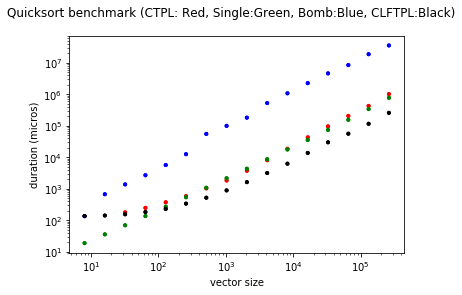

In [91]:
colors = ['red', 'green', 'blue', 'black']
plot(benchs, 'vector size', 'duration (micros)', colors)